## Load Libraries

In [1]:
suppressPackageStartupMessages({ 
    library(data.table) 
    library(dplyr) 
    library(ggplot2) 
    library(SingleCellExperiment)
    library(dplyr)
    library(celldex)
    library(SingleR)
    library(RColorBrewer)
    library(scater) 
    library(StabMap) 
    library(scran) 
    library(harmony) 
    library(patchwork)
    library(Seurat)
    library(plotly)
    library(NMF)
    library(ggalluvial)
        library(pheatmap)
    library(viridis)
})

In [18]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] viridis_0.6.2               viridisLite_0.4.1          
 [3] pheatmap_1.0.12             ggalluvial_0.12.5          
 [5] NMF_0.26                    cluster_2.1.4              
 [7] rngtools_1.5.2              registry_0.5-1             
 [9] plotly_4.10.0               sp_1.5-0                   
[11] SeuratObject_4

## Colours

In [2]:
# We can add colours as well if you really want! 
# this is the colour scheme, we usually keep this in a seperate file that we then call in our notebooks
celltype.colors.2 = c(
  "Epiblast" = "#635547",
  "Primitive Streak" = "#DABE99",
  "Caudal epiblast" = "#9e6762",
  "PGC" = "#FACB12",
  "Anterior Primitive Streak" = "#c19f70",
  "Notochord" = "#0F4A9C",
  "Def. endoderm" = "#F397C0",
  "Gut" = "#EF5A9D",
  "Nascent mesoderm" = "#C594BF",
  "Mixed mesoderm" = "#DFCDE4",
  "Intermediate mesoderm" = "#139992",
  "Caudal Mesoderm" = "#3F84AA",
  "Paraxial mesoderm" = "#8DB5CE",
  "Somitic mesoderm" = "#005579",
  "Pharyngeal mesoderm" = "#C9EBFB",
  "Cardiomyocytes" = "#B51D8D",
  "Allantois" = "#532C8A",
  "ExE mesoderm" = "#8870ad",
  "Mesenchyme" = "#cc7818",
  "Haematoendothelial progenitors" = "#FBBE92",
  "Endothelium" = "#ff891c",
  "Blood progenitors" = "#c9a997",
  "Blood progenitors 1" = "#f9decf",
  "Blood progenitors 2" = "#c9a997",
  "Erythroid" = "#EF4E22",
  "Erythroid1" = "#C72228",
  "Erythroid2" = "#f79083",
  "Erythroid3" = "#EF4E22",
  "NMP" = "#8EC792",
  "Neurectoderm" = "#65A83E",
  "Rostral neurectoderm" = "#65A83E",
  "Caudal neurectoderm" = "#354E23",
  "Neural crest" = "#C3C388",
  "Forebrain Midbrain Hindbrain" = "#647a4f",
  "Spinal cord" = "#CDE088",
  "Surface ectoderm" = "#f7f79e",
  "Visceral endoderm" = "#F6BFCB",
  "ExE endoderm" = "#7F6874",
  "ExE ectoderm" = "#989898",
  "Parietal endoderm" = "#1A1A1A"
)

In [3]:
# We can add colours as well if you really want!
# this is the colour scheme, we usually keep this in a seperate file that we then call in our notebooks
celltype.colors = c(
  "Epiblast" = "#635547",
  "Primitive_Streak" = "#DABE99",
  "Caudal_epiblast" = "#9e6762",
  "PGC" = "#FACB12",
  "Anterior_Primitive_Streak" = "#c19f70",
  "Notochord" = "#0F4A9C",
  "Def._endoderm" = "#F397C0",
  "Gut" = "#EF5A9D",
  "Nascent_mesoderm" = "#C594BF",
  "Mixed_mesoderm" = "#DFCDE4",
  "Intermediate_mesoderm" = "#139992",
  "Caudal_Mesoderm" = "#3F84AA",
  "Paraxial_mesoderm" = "#8DB5CE",
  "Somitic_mesoderm" = "#005579",
  "Pharyngeal_mesoderm" = "#C9EBFB",
  "Cardiomyocytes" = "#B51D8D",
  "Allantois" = "#532C8A",
  "ExE_mesoderm" = "#8870ad",
  "Mesenchyme" = "#cc7818",
  "Haematoendothelial_progenitors" = "#FBBE92",
  "Endothelium" = "#ff891c",
  "Blood_progenitors" = "#c9a997",
  "Blood_progenitors_1" = "#f9decf",
  "Blood_progenitors_2" = "#c9a997",
  "Erythroid" = "#EF4E22",
  "Erythroid1" = "#C72228",
  "Erythroid2" = "#f79083",
  "Erythroid3" = "#EF4E22",
  "NMP" = "#8EC792",
  "Neurectoderm" = "#65A83E",
  "Rostral_neurectoderm" = "#65A83E",
  "Caudal_neurectoderm" = "#354E23",
  "Neural_crest" = "#C3C388",
  "Forebrain_Midbrain_Hindbrain" = "#647a4f",
  "Spinal_cord" = "#CDE088",
  "Surface_ectoderm" = "#f7f79e",
  "Visceral_endoderm" = "#F6BFCB",
  "ExE_endoderm" = "#7F6874",
  "ExE_ectoderm" = "#989898",
  "Parietal_endoderm" = "#1A1A1A"
)

In [4]:
celltype.colors.extended = c(
"Epiblast" = "#635547",
"Primitive Streak" = "#DABE99",
"Caudal epiblast" = "#9e6762",
"PGC" = "#FACB12",
"Anterior Primitive Streak" = "#c19f70",
"Node"="#153b3d",
"Notochord" = "#0F4A9C",
"Gut tube" = "#EF5A9D",
"Hindgut" = "#F397C0",
"Midgut" = "#ff00b2",
"Foregut" = "#ffb7ff",
"Pharyngeal endoderm"="#95e1ff",
"Thyroid primordium"="#97bad3",
"Nascent mesoderm" = "#C594BF",
"Intermediate mesoderm" = "#139992",
"Caudal mesoderm" = "#3F84AA",
"Lateral plate mesoderm" = "#F9DFE6",
"Limb mesoderm" = "#e35f82",
"Forelimb" = "#d02d75",
"Kidney primordium" = "#e85639",
"Presomitic mesoderm"="#5581ca",#"#0000ff",#blue
"Somitic mesoderm" = "#005579",
"Posterior somitic tissues" = "#5adbe4",#"#40e0d0",#turquoise
"Paraxial mesoderm" = "#8DB5CE",
"Cranial mesoderm" = "#456722",#"#006400",#darkgreen
"Anterior somitic tissues"= "#d5e839",
"Sclerotome" = "#e3cb3a",#"#ffff00",#yellow
"Dermomyotome" = "#00BFC4",#"#a52a2a",#brown
"Pharyngeal mesoderm" = "#C9EBFB",
"Cardiopharyngeal progenitors" = "#556789",
"Anterior cardiopharyngeal progenitors"="#683ed8",
"Allantois" = "#532C8A",
"Mesenchyme" = "#cc7818",
"YS mesothelium" = "#ff7f9c",
"Epicardium"="#f79083",
"Embryo proper mesothelium" = "#ff487d",
"Cardiopharyngeal progenitors FHF"="#d780b0",
"Cardiomyocytes FHF 1"="#a64d7e",
"Cardiomyocytes FHF 2"="#B51D8D",
"Cardiopharyngeal progenitors SHF"="#4b7193",
"Cardiomyocytes SHF 1"="#5d70dc",
"Cardiomyocytes SHF 2"="#332c6c",
"Haematoendothelial progenitors" = "#FBBE92",
"Blood progenitors" = "#6c4b4c",
"Erythroid" = "#C72228",
"Chorioallantoic-derived erythroid progenitors"="#E50000",
"Megakaryocyte progenitors"="#e3cb3a",
"MEP"="#EF4E22",
"EMP"="#7c2a47",
"YS endothelium"="#ff891c",
"YS mesothelium-derived endothelial progenitors"="#AE3F3F",
"Allantois endothelium"="#2f4a60",
"Embryo proper endothelium"="#90e3bf",
"Venous endothelium"="#bd3400",
"Endocardium"="#9d0049",
"NMPs/Mesoderm-biased" = "#89c1f5",
"NMPs" = "#8EC792",
"Ectoderm" = "#ff675c",
"Optic vesicle" = "#bd7300",
"Ventral forebrain progenitors"="#a0b689",
"Early dorsal forebrain progenitors"="#0f8073",
"Late dorsal forebrain progenitors"="#7a9941",
"Midbrain/Hindbrain boundary"="#8ab3b5",
"Midbrain progenitors"="#9bf981",
"Dorsal midbrain neurons"="#12ed4c",
"Ventral hindbrain progenitors"="#7e907a",
"Dorsal hindbrain progenitors"="#2c6521",
"Hindbrain floor plate"="#bf9da8",
"Hindbrain neural progenitors"="#59b545",
"Neural tube"="#233629",
"Migratory neural crest"="#4a6798",
"Branchial arch neural crest"="#bd84b0",
"Frontonasal mesenchyme"="#d3b1b1",
"Spinal cord progenitors"="#6b2035",
"Dorsal spinal cord progenitors"="#e273d6",
"Non-neural ectoderm" = "#f7f79e",
"Surface ectoderm" = "#fcff00",
"Epidermis" = "#fff335",
"Limb ectoderm" = "#ffd731",
"Amniotic ectoderm" = "#dbb400",
"Placodal ectoderm" = "#ff5c00",
"Otic placode"="#f1a262",
"Otic neural progenitors"="#00b000",
"Visceral endoderm" = "#F6BFCB",
"ExE endoderm" = "#7F6874",
"ExE ectoderm" = "#989898",
"Parietal endoderm" = "#1A1A1A"
)

## Set Data Locations and Load in Data

In [5]:
# set paths to data locations
io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2/"

io$seurat = file.path(io$main, "projects/10_Axin_1_2/data_from_bart/seurat.rds") 
io$metadata = file.path(io$main, "projects/10_Axin_1_2/data_from_bart/metadata.txt.gz") 

io$mapping_metadata = file.path(io$main, "projects/10_Axin_1_2/data_from_bart/sample_metadata_after_mapping.txt.gz") 
io$vivo.atlas = file.path(io$main, "projects/03_seqFISH/analyses/seurat_object_generation/vivo_seurat_6.5_7.75.Rds")

In [6]:
# set the working directory
setwd(io$main)

In [7]:
# load in the data 
seurat <- readRDS(io$seurat)
metadata <- fread(io$metadata)
mapping_metadata <- fread(io$mapping_metadata)


### ADD THE METADATA TO THE SEURAT OBJECT ###
# convert the meta.data to a data.fram
mapping_metadata_df <-as.data.frame(mapping_metadata)

#set the rownames of the dataframe 
rownames(mapping_metadata_df) <- mapping_metadata_df$cell

#add the metadata to the seurat object
seurat_updated <- AddMetaData(seurat, metadata = mapping_metadata_df)

## Quality Control

In [8]:
# generate a seurat object with the cells that passed QC
seurat_postQC <- seurat_updated[,seurat_updated@meta.data$pass_rnaQC == "TRUE" &
                               seurat_updated@meta.data$doublet_call == "FALSE"]

# add a new metadata column that lists the genotype
seurat_postQC@meta.data$genotype <- recode(seurat_postQC@meta.data$orig.ident, 
                                                             "LibA" = "mutant",
                                                             "LibB" = "wildtype")

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.

Warning message:
“Removed 1 rows containing missing values (`geom_hline()`).”


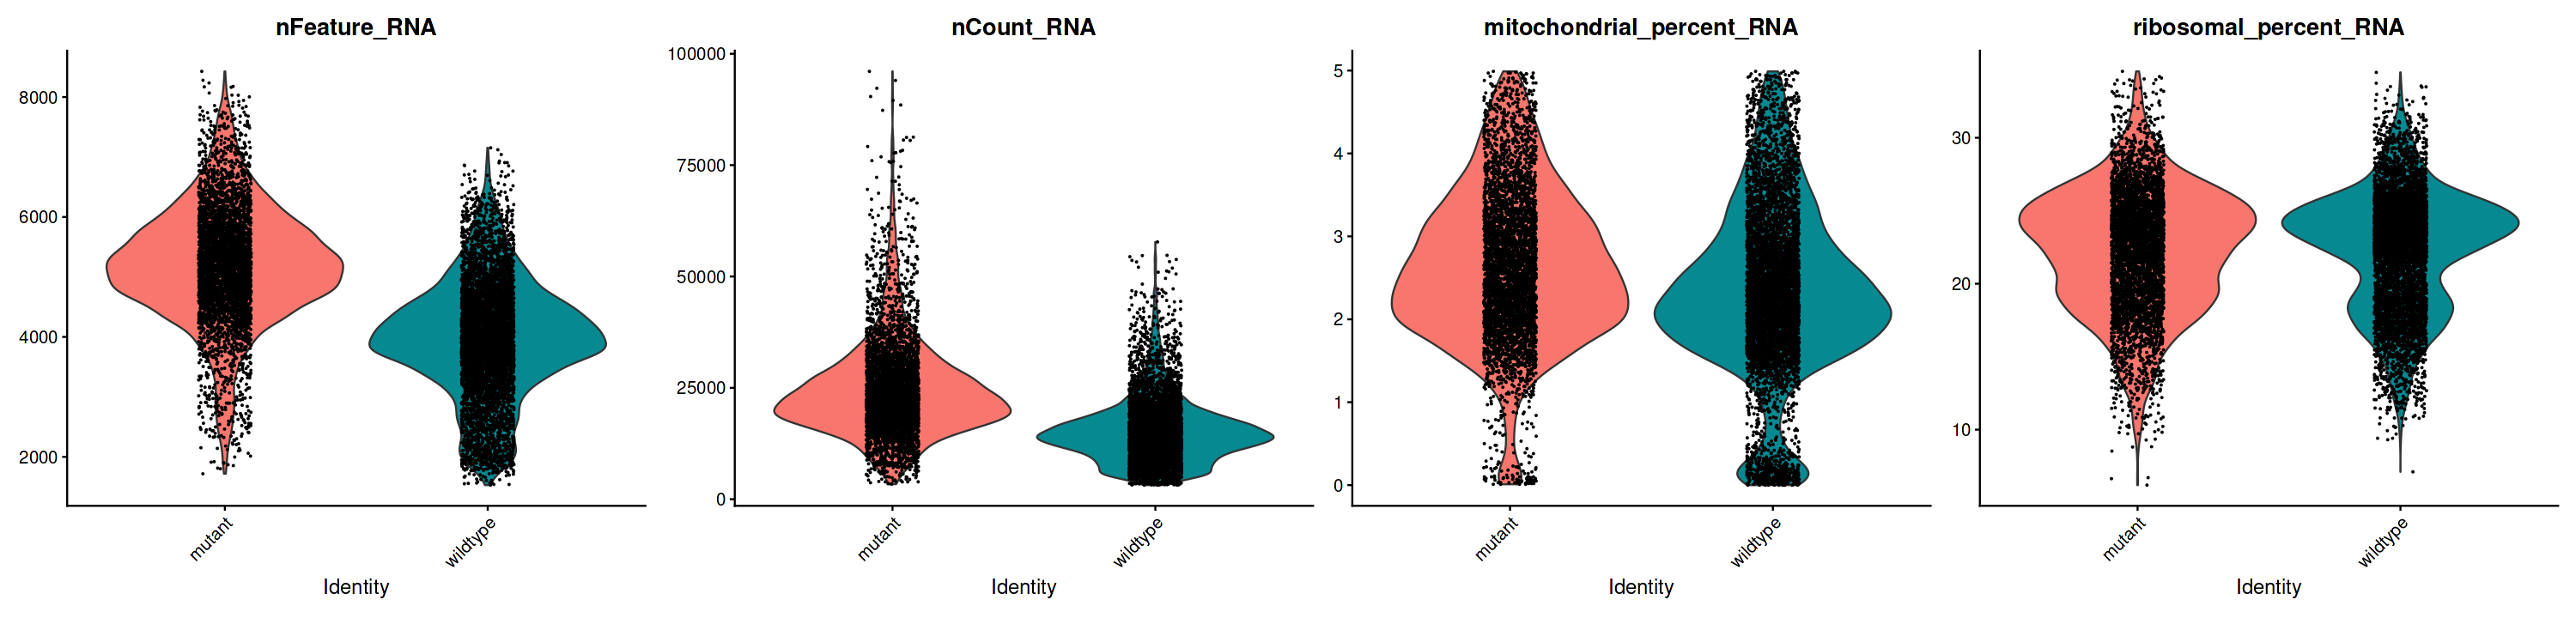

In [9]:
options(repr.plot.width=25, repr.plot.height=6)
Idents(seurat_postQC) <- "genotype"

# Visualize QC metrics as a violin plot
VlnPlot(seurat_postQC, features = c("nFeature_RNA", "nCount_RNA", "mitochondrial_percent_RNA", "ribosomal_percent_RNA"),
        ncol = 4,
        split.by = "genotype") + geom_hline(yintercept = 1)

Warning message in `==.default`(seurat_postQC@meta.data$genotype, geno):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(seurat_postQC@meta.data$genotype, geno):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


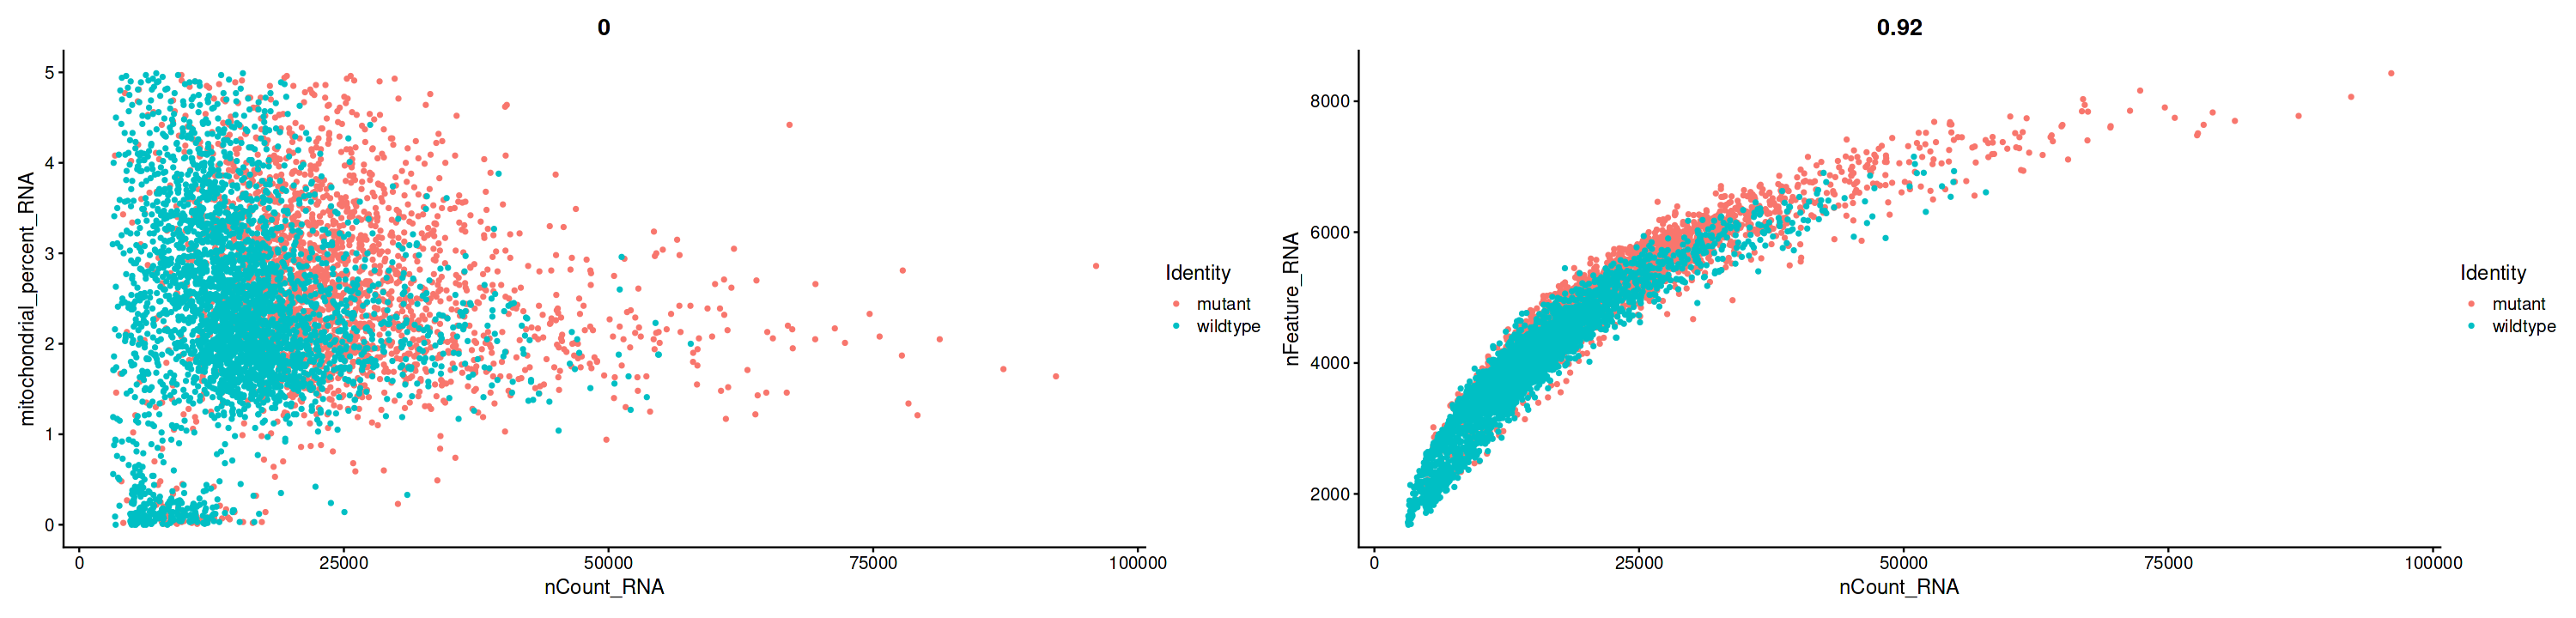

In [10]:
options(repr.plot.width=25, repr.plot.height=6)

# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

geno <- c("wildtype", "mutant")
plot1 <- FeatureScatter(seurat_postQC[,seurat_postQC@meta.data$genotype == geno],
                        feature1 = "nCount_RNA",
                        feature2 = "mitochondrial_percent_RNA")

plot2 <- FeatureScatter(seurat_postQC[,seurat_postQC@meta.data$genotype == geno],
                        feature1 = "nCount_RNA",
                        feature2 = "nFeature_RNA")
plot1 + plot2

Warning message:
“Removed 1 rows containing missing values (`geom_hline()`).”


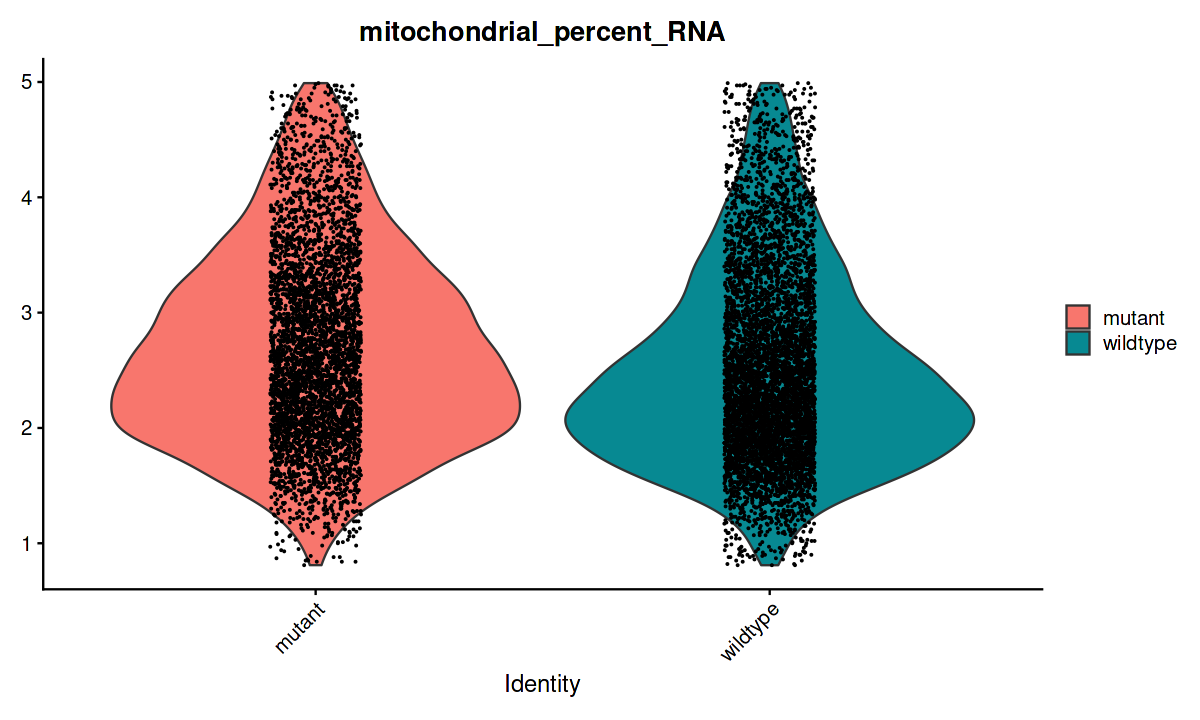

In [11]:
options(repr.plot.width=10, repr.plot.height=6)
## lets additionally filter out the cells with low mitochondiral %
# generate a seurat object with the cells that passed QC
seurat_postQC <- seurat_postQC[,seurat_postQC@meta.data$mitochondrial_percent_RNA > 0.8]

# Visualize QC metrics as a violin plot
VlnPlot(seurat_postQC, features = c("mitochondrial_percent_RNA"),
        ncol = 1,
        split.by = "genotype") + geom_hline(yintercept = 0.8)

## Normalize the Data, Find Variable Features, Run PCA, Cluster and Run UMAP

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Centering and scaling data matrix

PC_ 1 
Positive:  Dab2, Cubn, Amn, Lgmn, Apoe, Cotl1, Apom, Ttr, Ctsl, Apob 
	   Myo6, Ctsb, Ctsh, Apoa1, Slc2a3, Spink1, Clic6, Folr1, Ctsz, Mt1 
	   Slc16a1, Slc13a4, Atp1b1, Fth1, Rbp4, H19, Cited1, Podxl, Dpp4, Cldn6 
Negative:  Tmsb10, Ifitm2, Ccnd1, Pbx1, Sox11, Basp1, 2810417H13Rik, Fabp5, Lef1, Rpl12 
	   Marcks, Myh10, Hmga2, Hdgf, Tenm3, Auts2, Setbp1, Ifitm1, Pou5f1, Stmn1 
	   Tuba1a, Rhobtb3, Ccdc88a, Chd7, Cdh11, Gli3, Dock11, Igf1r, Ccnd2, Adgrl2 
PC_ 2 
Positive:  Utf1, Pou3f1, Bex1, Epcam, L1td1, Elf5, Dnmt3b, Sfn, Gjb3, Cldn3 
	   Eif4ebp1, Wnt7b, Sox2, Tfap2c, Satb1, Gm1673, Ddah1, Rangrf, Gm10260, Tex1

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10250
Number of edges: 358878

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8704
Number of communities: 17
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:01:17 UMAP embedding parameters a = 0.9922 b = 1.112

12:01:17 Read 10250 rows and found 20 numeric columns

12:01:17 Using Annoy for neighbor search, n_neighbors = 30

12:01:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:01:18 Writing NN index file to temp file /tmp/RtmpfZ5wU3/file33f9924428fcae

12:01:18 Searching Annoy index using 1 thread, search_k = 3000

12:01:21 Annoy recall = 100%

12:01:21 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbor

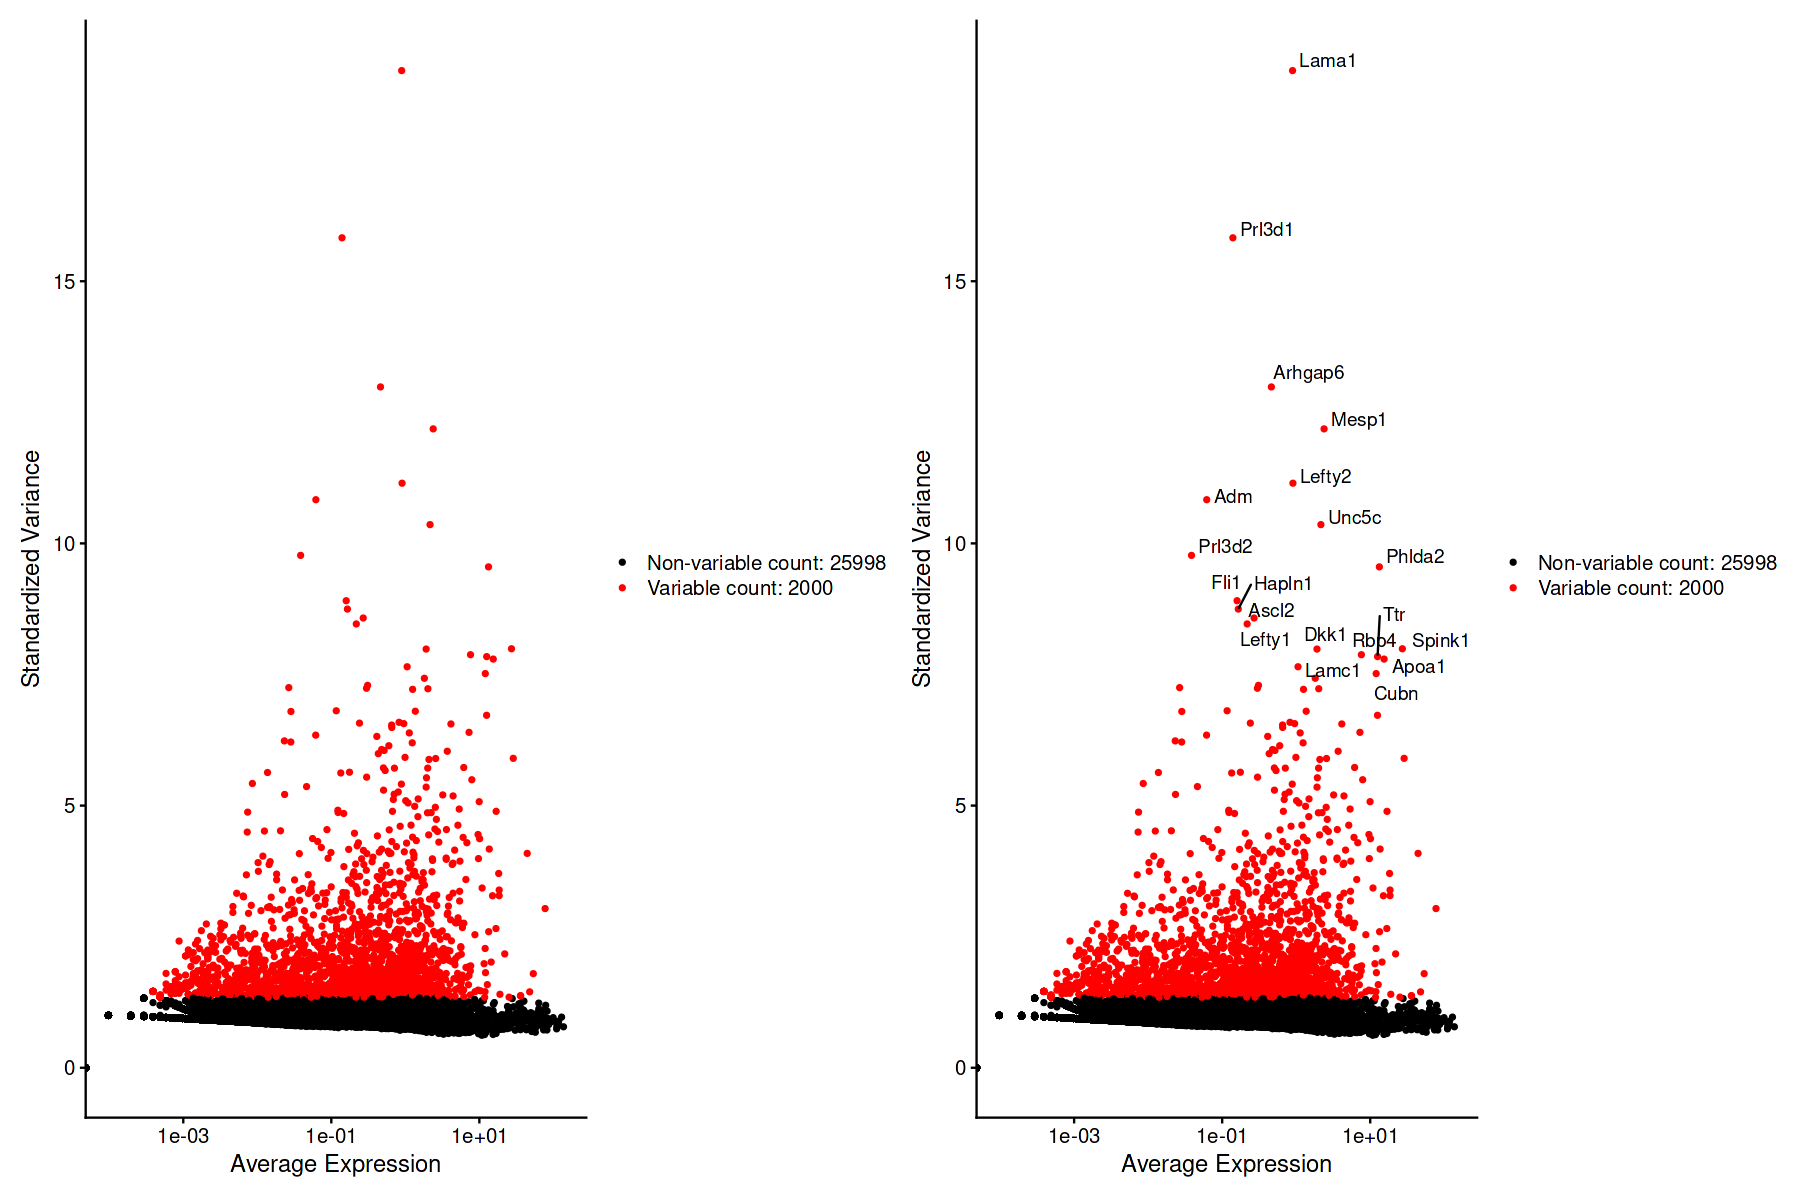

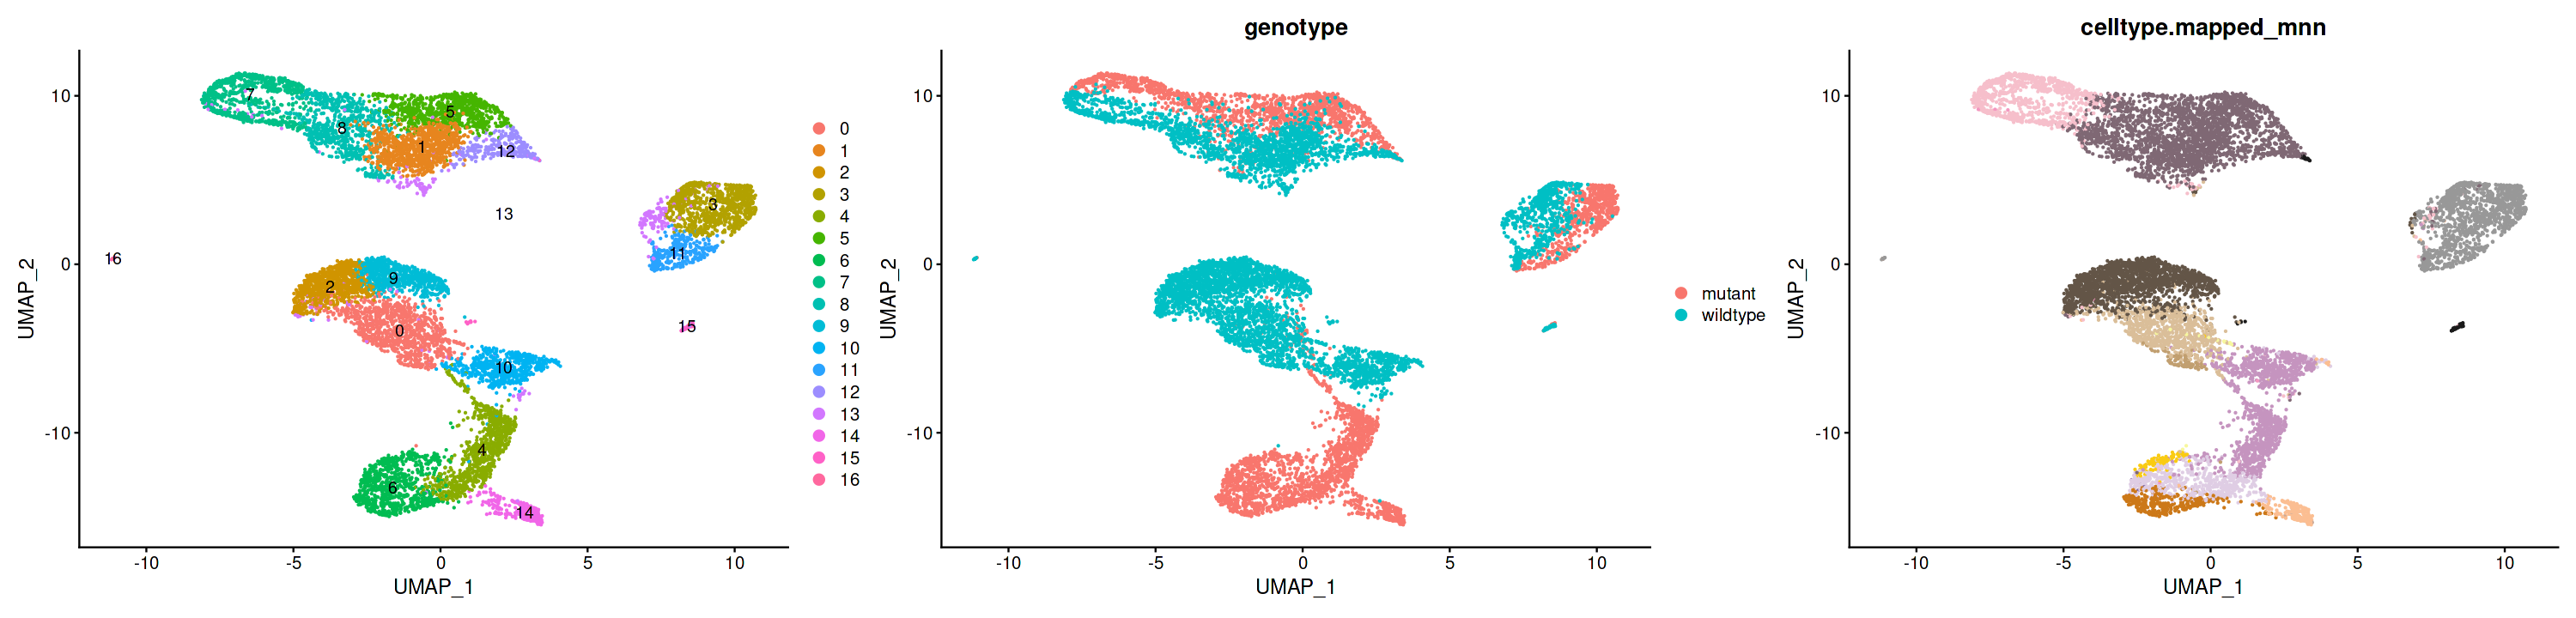

In [12]:
# Normalize the data
seurat_postQC <- NormalizeData(seurat_postQC)

options(repr.plot.width=15, repr.plot.height=10)
seurat_postQC <- FindVariableFeatures(seurat_postQC, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top20 <- head(VariableFeatures(seurat_postQC), 20)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(seurat_postQC)
plot2 <- LabelPoints(plot = plot1, points = top20, repel = TRUE)
plot1 + plot2

# Scale the Data
all.genes <- rownames(seurat_postQC)
seurat_postQC <- ScaleData(seurat_postQC, features = all.genes)

## Perform Linear dimensional reduction
seurat_postQC <- RunPCA(seurat_postQC, features = VariableFeatures(object = seurat_postQC))

## Find Clusters and Run UMAP
seurat_postQC <- FindNeighbors(seurat_postQC, dims = 1:20)
seurat_postQC <- FindClusters(seurat_postQC, resolution = 1)
seurat_postQC <- RunUMAP(seurat_postQC, dims = 1:20)

# Visualize the data
options(repr.plot.width=25, repr.plot.height=6)
p1 <- DimPlot(seurat_postQC, reduction = "umap", label = TRUE)
p2 <- DimPlot(seurat_postQC, reduction = "umap", group.by = "genotype")
p3 <- DimPlot(seurat_postQC, reduction = "umap", group.by = "celltype.mapped_mnn") + scale_color_manual(values=celltype.colors)
p1 | p2 | p3 + theme(legend.position='none')

## rPCA Integration of the Axin dKO Mutant and WildType Cells

In [13]:
# Load the parallel package
library(parallel)

#provide seurat object to integrate
object <- seurat_postQC

### rPCA within STAGES ###

# Set parameters
num_features <- 2000
k_anchor <- 5
k_weight <- 100

  # Split object based on category
  object.split <- SplitObject(object, split.by = "genotype")
  
  # Normalize and identify variable features for each dataset independently
  object.split <- lapply(X = object.split, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = num_features)
  })
  
  features <- SelectIntegrationFeatures(object.list = object.split, nfeatures = num_features)
  
  # Select features that are repeatedly variable across datasets for integration
  object.split <- lapply(X = object.split, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
  })
  
  # Find Integration Anchors
  if (length(unique(object@meta.data$genotype)) > 1) {   
    rPCA_anchors <- FindIntegrationAnchors(object.list = object.split, 
                                           anchor.features = features, 
                                           reduction = "rpca", 
                                           k.anchor = k_anchor,
                                           scale = FALSE
    )

    # Integrate the data
    object_integrated <- IntegrateData(anchorset = rPCA_anchors,
                                       k.weight = k_weight,
                                       new.assay.name = "across_genotype_integration"
                                       ) 
    # Return the integrated object
    return(object_integrated)
  } 


Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 2692 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from across_genotype_integration_ to acrossgenotypeintegration_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from across_genotype_integration_ to acrossgenotypeintegration_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from across_genotype_integration_ to acrossgenotypeintegration_”


An object of class Seurat 
29998 features across 10250 samples within 2 assays 
Active assay: across_genotype_integration (2000 features, 2000 variable features)
 1 other assay present: RNA

In [14]:
## Write a Function to Perform Seurat Analyses

run_seurat_analysis <- function(object_integrated, dims_to_use = 1:20, cluster_resolution = 1) {
  # Scale and run PCA
  seurat_object <- ScaleData(object_integrated)
  seurat_object <- RunPCA(seurat_object)
  
  # Elbow plot
  ElbowPlot(seurat_object, ndims = 50)
  
  # Run UMAP, Find Neighbors, and Find Clusters
  seurat_object <- RunUMAP(seurat_object, dims = dims_to_use) %>%
    FindNeighbors(., reduction = "pca", dims = dims_to_use) %>%
    FindClusters(., resolution = cluster_resolution)
  
  return(seurat_object)
}


In [15]:
result <- run_seurat_analysis(object_integrated, dims_to_use = 1:20, cluster_resolution = 1)

Centering and scaling data matrix

PC_ 1 
Positive:  Tmsb10, Fabp5, Siva1, Basp1, Anp32a, Ifitm2, Dut, 2810417H13Rik, Snrpn, Dctpp1 
	   Psip1, Pou5f1, Ccnd1, Marcks, Pbx1, Sox11, Sms, Tdgf1, Hdgf, Nap1l1 
	   Stmn1, Eif4ebp1, Hmga2, Lef1, Anp32b, Fam60a, Tuba1a, Slc16a3, Tenm3, Tcf7l1 
Negative:  Dab2, Cubn, Lgmn, Amn, Apom, Ttr, Cotl1, Apoa1, Apob, Myo6 
	   Ctsl, Ctsb, Slc2a3, Fth1, Apoe, Spink1, Ctsh, H19, Clic6, Rbp4 
	   Cited1, Folr1, Slc16a1, Podxl, Ctsz, Slc13a4, Atp1b1, Apoa4, Cltc, Mttp 
PC_ 2 
Positive:  Id3, Fn1, Gpc6, Tceal8, Prtg, Cachd1, Gpc3, Stmn1, Pbx1, Tdgf1 
	   Lef1, Mesp1, Cdh2, Pcdh7, Id1, Emb, Ifitm1, Ext1, Greb1, Cdh11 
	   Smad1, Robo1, Peg3, Tenm3, Lhx1, Auts2, Bex4, Tenm4, 2810417H13Rik, Sox4 
Negative:  Elf5, Gm1673, Htra1, Ddah1, Sfn, Wnt7b, Tex19.1, Gjb3, S100a6, Tfap2c 
	   Cldn3, Zfp42, Fgfbp1, Fabp3, Trap1a, Nat8l, Nup62cl, Bmp8b, Dppa4, Wnt6 
	   Bex1, Perp, AU018091, Anxa5, Dnmt3l, Rhox5, Esrrb, Gm9, Ngfrap1, Tinagl1 
PC_ 3 
Positive:  Dnmt3b, Pim2,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10250
Number of edges: 366531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8640
Number of communities: 19
Elapsed time: 0 seconds


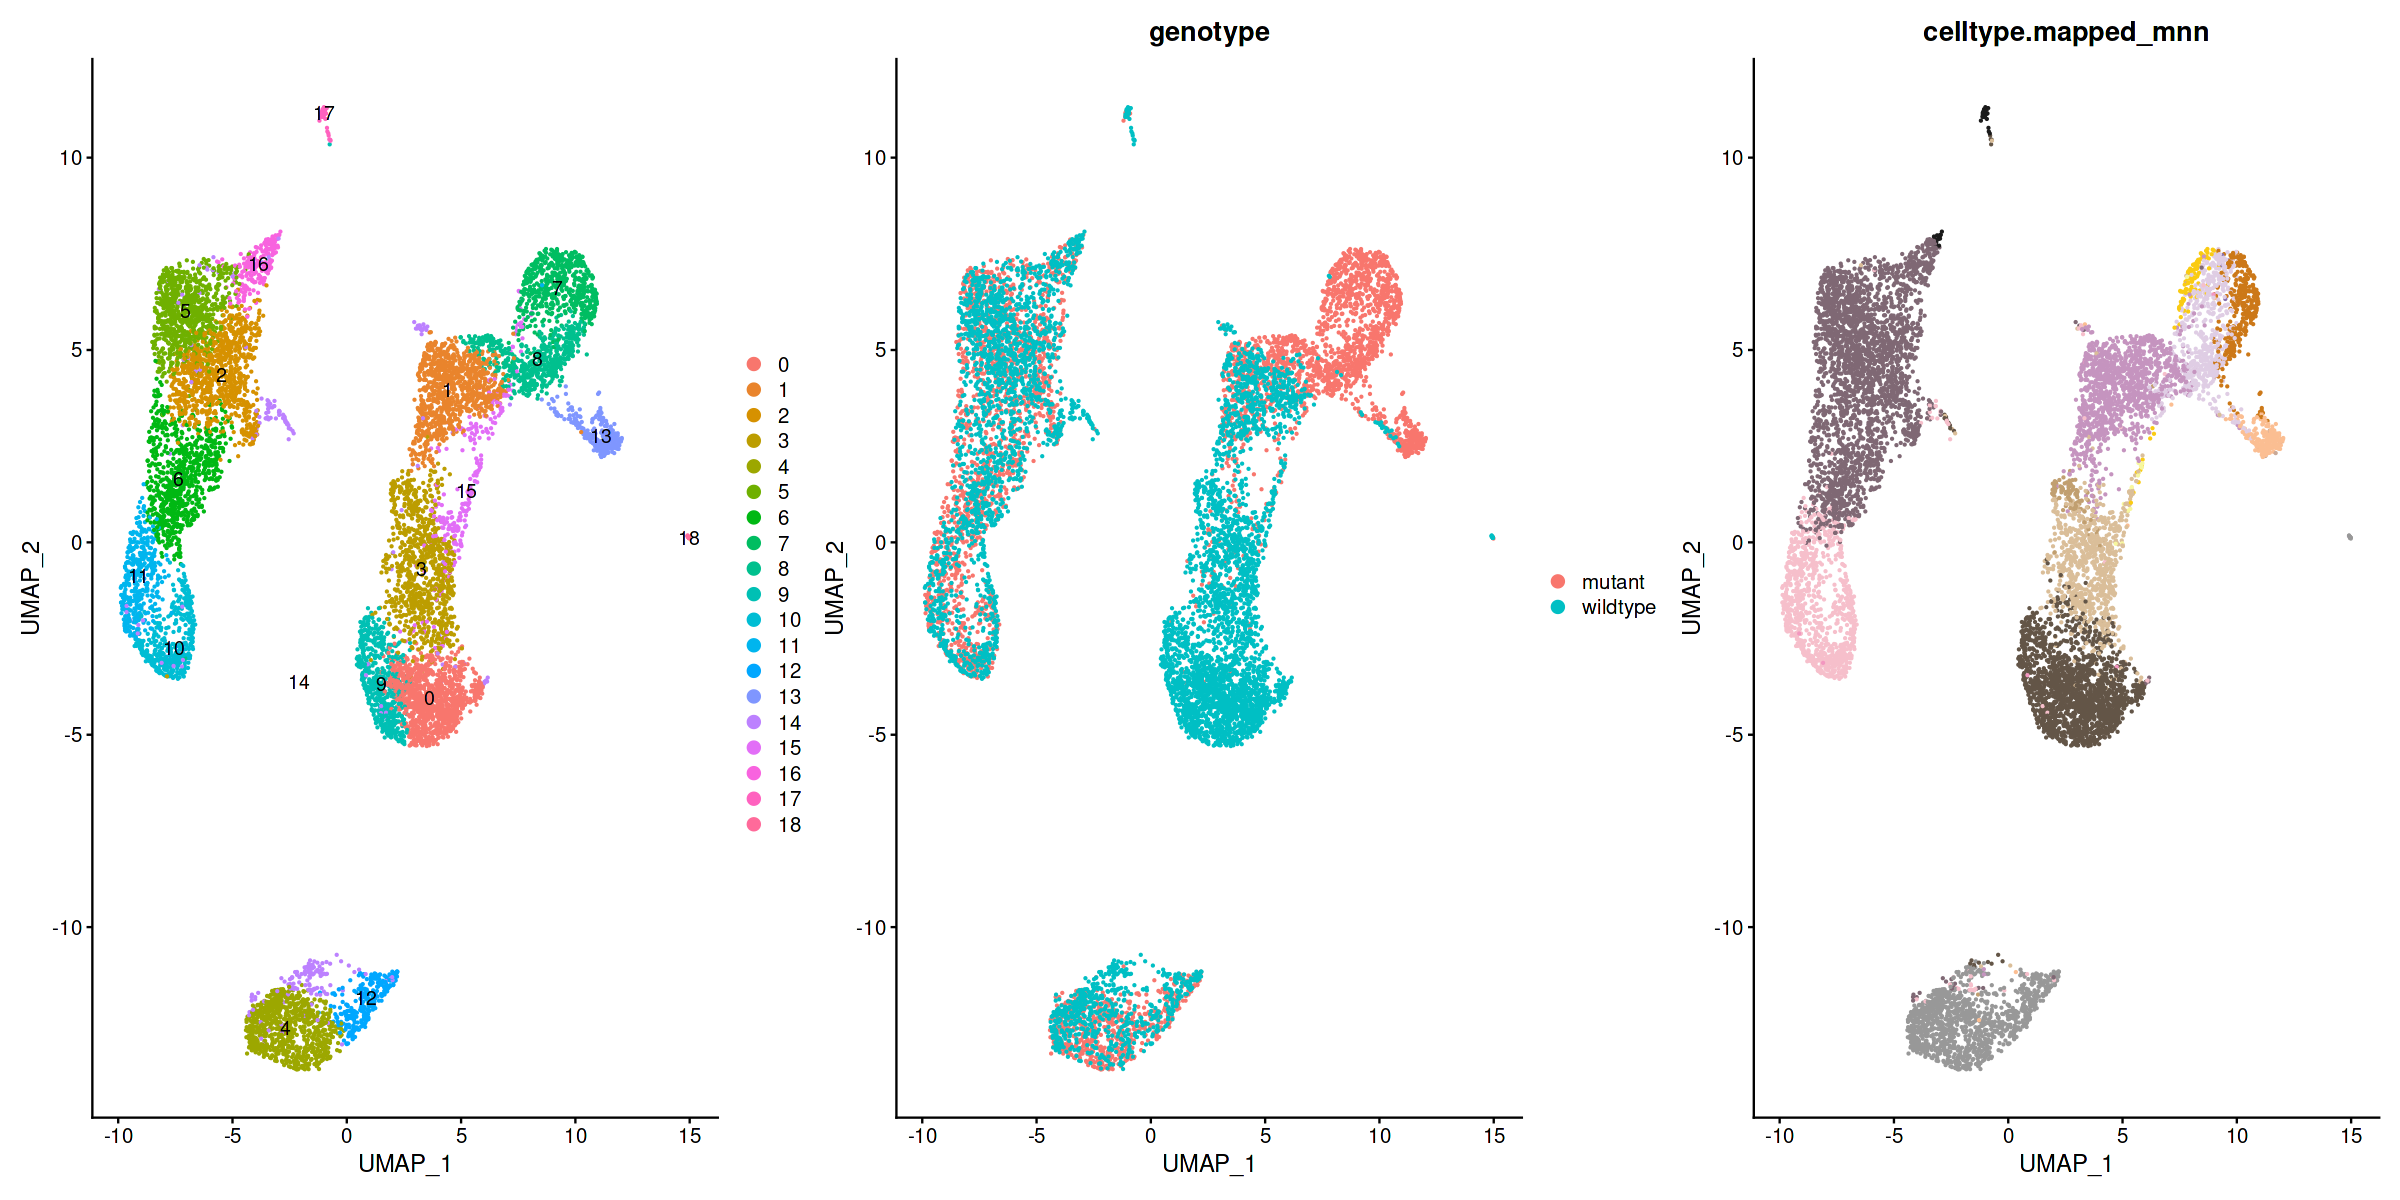

In [16]:
options(repr.plot.width=20, repr.plot.height=10)
p1 <- DimPlot(result, reduction = "umap", label = TRUE)
p2 <- DimPlot(result, reduction = "umap", group.by = "genotype")
p3 <- DimPlot(result, reduction = "umap", group.by = "celltype.mapped_mnn") + scale_color_manual(values=celltype.colors)
p1 | p2 | p3 + theme(legend.position='none')

In [17]:
saveRDS(result, "projects/10_Axin_1_2/github_submission/outputs/1/integrated_axin_dataset_seurat.rds")